In [1]:
##Simulate random data for the spot & futures prices
##(replace this with spot & futures data)

In [2]:
import StatsKit
import CSV

In [39]:
import StatsPlots
import DataFrames

In [34]:
using GLM 

In [14]:
futures = CSV.read("Futures_data.csv")

,Date,HO-Futures
,String,Float64
1,6/2/1986,0.378
2,6/3/1986,0.38
3,6/4/1986,0.358
4,6/5/1986,0.374
5,6/6/1986,0.372
6,6/9/1986,0.366
7,6/10/1986,0.36
8,6/11/1986,0.384
9,6/12/1986,0.394


In [15]:
spot = CSV.read("HO-Spot.csv")

,Date,HO-Spot
,String,Float64
1,6/2/1986,0.402
2,6/3/1986,0.393
3,6/4/1986,0.378
4,6/5/1986,0.39
5,6/6/1986,0.385
6,6/9/1986,0.373
7,6/10/1986,0.365
8,6/11/1986,0.389
9,6/12/1986,0.394


In [16]:
futures

,Date,HO-Futures
,String,Float64
1,6/2/1986,0.378
2,6/3/1986,0.38
3,6/4/1986,0.358
4,6/5/1986,0.374
5,6/6/1986,0.372
6,6/9/1986,0.366
7,6/10/1986,0.36
8,6/11/1986,0.384
9,6/12/1986,0.394


In [31]:
df = join(spot, futures, kind=:inner, on=:Date)

,Date,HO-Spot,HO-Futures
,String,Float64,Float64
1,6/2/1986,0.402,0.378
2,6/3/1986,0.393,0.38
3,6/4/1986,0.378,0.358
4,6/5/1986,0.39,0.374
5,6/6/1986,0.385,0.372
6,6/9/1986,0.373,0.366
7,6/10/1986,0.365,0.36
8,6/11/1986,0.389,0.384
9,6/12/1986,0.394,0.394


In [41]:
DataFrames.rename!(df, [:date,:spot,:futures])

,date,spot,futures
,String,Float64,Float64
1,6/2/1986,0.402,0.378
2,6/3/1986,0.393,0.38
3,6/4/1986,0.378,0.358
4,6/5/1986,0.39,0.374
5,6/6/1986,0.385,0.372
6,6/9/1986,0.373,0.366
7,6/10/1986,0.365,0.36
8,6/11/1986,0.389,0.384
9,6/12/1986,0.394,0.394


In [17]:
#n = 500;
#spot = cumsum(randn(n));
#α = .25
#β = 2.46
#σ = 2.0
#z = randn(n) * σ
#futures = α .+ β .* spot .+ z;

In [18]:
fobs = 8470
sobs = 8497

8497

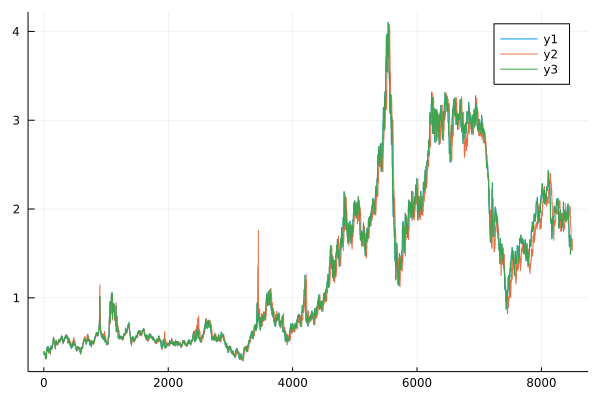

In [19]:
StatsPlots.plot!(futures[2])

In [20]:
ΔS = diff(spot[2]);
ΔF = diff(futures[2]);

In [21]:
ΔS

8496-element Array{Float64,1}:
 -0.009000000000000008
 -0.015000000000000013
  0.01200000000000001
 -0.0050000000000000044
 -0.01200000000000001
 -0.008000000000000007
  0.02400000000000002
  0.0050000000000000044
  0.0040000000000000036
 -0.019000000000000017
 -0.0050000000000000044
  0.0020000000000000018
  0.006000000000000005
  ⋮
 -0.02299999999999991
 -0.03100000000000014
  0.06600000000000006
  0.0040000000000000036
  0.018000000000000016
  0.0
 -0.025000000000000133
  0.02300000000000013
 -0.010000000000000009
 -0.007000000000000117
 -0.07499999999999996
 -0.04600000000000004

In [22]:
ΔF

8469-element Array{Float64,1}:
  0.0020000000000000018
 -0.02200000000000002
  0.016000000000000014
 -0.0020000000000000018
 -0.006000000000000005
 -0.006000000000000005
  0.02400000000000002
  0.010000000000000009
  0.0030000000000000027
 -0.019000000000000017
 -0.0020000000000000018
 -0.0010000000000000009
  0.008000000000000007
  ⋮
  0.0
 -0.026000000000000023
  0.03500000000000014
 -0.009000000000000119
 -0.010999999999999899
 -0.07400000000000007
 -0.04400000000000004
 -0.06999999999999984
 -0.010000000000000009
  0.0020000000000000018
  0.03799999999999981
  0.0040000000000000036

In [23]:
X = ones(fobs-1,2)
X[:,2] .= ΔF
y = ones(sobs-1,2)
y[:,2] .= ΔS

8496-element view(::Array{Float64,2}, :, 2) with eltype Float64:
 -0.009000000000000008
 -0.015000000000000013
  0.01200000000000001
 -0.0050000000000000044
 -0.01200000000000001
 -0.008000000000000007
  0.02400000000000002
  0.0050000000000000044
  0.0040000000000000036
 -0.019000000000000017
 -0.0050000000000000044
  0.0020000000000000018
  0.006000000000000005
  ⋮
 -0.02299999999999991
 -0.03100000000000014
  0.06600000000000006
  0.0040000000000000036
  0.018000000000000016
  0.0
 -0.025000000000000133
  0.02300000000000013
 -0.010000000000000009
 -0.007000000000000117
 -0.07499999999999996
 -0.04600000000000004

In [24]:
coefs = StatsKit.MultivariateStats.llsq(ΔF, ΔS; bias=false)
coefs[2]

LoadError: MethodError: no method matching llsq(::Array{Float64,1}, ::Array{Float64,1}; bias=false)
Closest candidates are:
  llsq(!Matched::AbstractArray{T,2}, ::Union{AbstractArray{T,1}, AbstractArray{T,2}}; trans, bias) where T<:Real at C:\Users\spenc\.julia\packages\MultivariateStats\BYMwD\src\lreg.jl:22

In [25]:
M = 25
hedgeratios = zeros(M)
ibeg = 61
iend = 121
ii = 1
step = 30

for i=1:step:(step*M)
    coefs = StatsKit.MultivariateStats.llsq(X[ibeg:iend,:], ΔS[ibeg:iend]; bias=false)
    hedgeratios[ii] = coefs[2]
    ibeg += step
    iend += step
    ii += 1
end

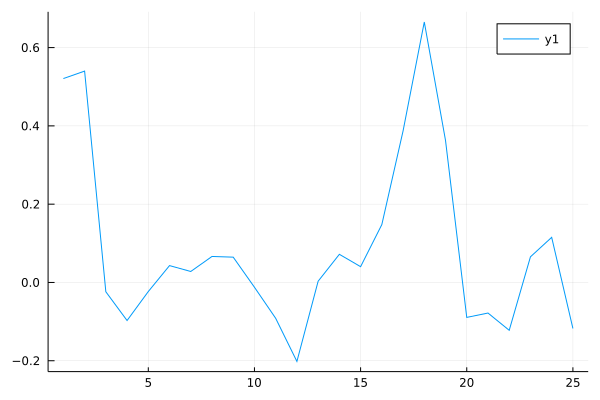

In [26]:
StatsPlots.plot(hedgeratios)

In [27]:
hedgeratios[1:25]

25-element Array{Float64,1}:
  0.5209305552700281
  0.5399688795475923
 -0.02380229661235346
 -0.09725117644781887
 -0.023202336581006306
  0.04307922687415133
  0.028034485274446967
  0.06642303820736124
  0.06462961720025891
 -0.01222916283422276
 -0.09156010230179014
 -0.20175080144346116
  0.003183859638217467
  0.07189524541561418
  0.04030336532504762
  0.1478887887402064
  0.3869741530191272
  0.6653926651509674
  0.36276924499148105
 -0.08927431300439277
 -0.07811924778927254
 -0.12222669304451801
  0.06547341151054095
  0.11525776658270352
 -0.11751804160181283

In [28]:
Logfutures = log.(futures[2])
Logspot = log.(spot[2])

8497-element Array{Float64,1}:
 -0.9113031903631159
 -0.9339456671128757
 -0.9728610833625494
 -0.941608539858445
 -0.9545119446943529
 -0.9861768593383216
 -1.0078579253996456
 -0.9441759353636907
 -0.9314043696842031
 -0.9213032736976993
 -0.9702190738997107
 -0.9834994815676051
 -0.9781661355922425
  ⋮
  0.4774756440844366
  0.45805755822733496
  0.4989554511955033
  0.501381164937991
  0.5122246446796981
  0.5122246446796981
  0.4971322966339881
  0.511025603768657
  0.5050087384444258
  0.5007752879124892
  0.4542552722775964
  0.4246139269469252

In [77]:
ΔLS = diff(Logspot);
ΔLF = diff(Logfutures);

In [78]:
X = ones(fobs-1,2)
X[:,2] .= ΔLF
y = ones(sobs-1,2)
y[:,2] .= ΔLS

8496-element view(::Array{Float64,2}, :, 2) with eltype Float64:
 -0.022642476749759832
 -0.03891541624967365
  0.031252543504104446
 -0.012903404835907906
 -0.0316649146439687
 -0.021681066061324028
  0.06368199003595487
  0.012771565679487562
  0.010101095986503883
 -0.04891580020201147
 -0.0132804076678944
  0.005333345975362613
  0.015831465216680662
  ⋮
 -0.014167160264780099
 -0.01941808585710164
  0.040897892968168315
  0.002425713742487734
  0.010843479741707074
  0.0
 -0.015092348045709969
  0.013893307134668909
 -0.00601686532423118
 -0.004233450531936689
 -0.046520015634892775
 -0.029641345330671198

In [79]:
M = 25
loghedgeratios = zeros(M)
ibeg = 1
iend = 60
ii = 1
step = 30

for i=1:step:(step*M)
    coefs = StatsKit.MultivariateStats.llsq(X[ibeg:iend,:], ΔLS[ibeg:iend]; bias=false)
    loghedgeratios[ii] = coefs[2]
    ibeg += step
    iend += step
    ii += 1
end

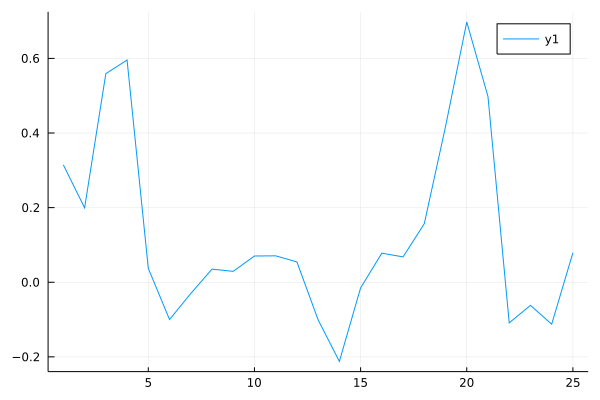

In [80]:
StatsPlots.plot(loghedgeratios)

In [81]:
hedgeratios[1:25]


25-element Array{Float64,1}:
  0.11485813536786421
  0.07290607625417198
  0.22084483986286438
  0.2355769136434643
  0.009976117839960578
 -0.04981758594595243
 -0.013046617844434618
  0.0190143664343345
  0.01568569536449205
  0.0369768938243264
  0.035964988860275
  0.02675257267563449
 -0.05002430076465699
 -0.10124406644514133
 -0.003156443128147337
  0.036639669439349966
  0.02469469350950438
  0.06528209297456447
  0.16543283935293637
  0.28938013919761907
  0.20324541666046742
 -0.05387086370566475
 -0.03353950503416787
 -0.06212375321440948
  0.035941231013147515

In [82]:
loghedgeratios[1:25]

25-element Array{Float64,1}:
  0.31452192882745444
  0.19938734723660617
  0.5591778931617372
  0.5956790369788915
  0.037194036423233844
 -0.09995959216858318
 -0.030305565311412666
  0.035161762499103785
  0.029178922355158655
  0.0703189651327663
  0.07080213583085572
  0.05444764550628052
 -0.10091607777936601
 -0.21225824916714417
 -0.015112854975313884
  0.07787778277399163
  0.06795912946077759
  0.15685722896027862
  0.41718634728426657
  0.6975855773349044
  0.4976728689520702
 -0.1088247859622557
 -0.061988748711998276
 -0.11243136582811368
  0.07899989738555199

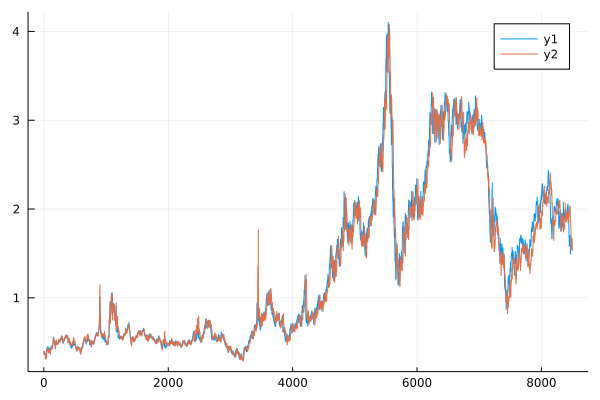

In [7]:
StatsPlots.plot(futures[2])
StatsPlots.plot!(spot[2])

In [12]:
futures[:2]

8470-element Array{Float64,1}:
 0.378
 0.38
 0.358
 0.374
 0.372
 0.366
 0.36
 0.384
 0.394
 0.397
 0.378
 0.376
 0.375
 ⋮
 1.698
 1.672
 1.707
 1.698
 1.687
 1.613
 1.569
 1.499
 1.489
 1.491
 1.529
 1.533

In [42]:
GLM.lm(@formula(spot ~ futures),df[1:60,:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

spot ~ 1 + futures

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.044306   0.0104833   4.23    <1e-4   0.0233214  0.0652907
futures      0.875631   0.0279238  31.36    <1e-37  0.819735   0.931526
────────────────────────────────────────────────────────────────────────